In [2]:
# import libraries
import time
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import seaborn as sns
import re
from tld import get_tld
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression, Ridge, Lasso,ElasticNet,HuberRegressor,PassiveAggressiveRegressor,SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from keras.utils import np_utils
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import requests

pd.set_option('display.float_format', lambda x: '%.3f' % x)

warnings.filterwarnings("ignore")
%matplotlib inline

2022-02-16 15:27:49.445 INFO    tensorflow: Enabling eager execution
2022-02-16 15:27:49.476 INFO    tensorflow: Enabling v2 tensorshape
2022-02-16 15:27:49.476 INFO    tensorflow: Enabling resource variables
2022-02-16 15:27:49.476 INFO    tensorflow: Enabling tensor equality
2022-02-16 15:27:49.480 INFO    tensorflow: Enabling control flow v2


In [2]:
from bs4 import BeautifulSoup

In [4]:
ls

 Volume in drive D is D 
 Volume Serial Number is F8FA-037C

 Directory of D:\kaggle!\malicious-url

16/02/2022  03:27 pm    <DIR>          .
16/02/2022  03:26 pm    <DIR>          ..
06/02/2022  03:55 pm    <DIR>          .ipynb_checkpoints
07/02/2022  11:28 am    <DIR>          __pycache__
06/09/2021  12:06 pm    <DIR>          catboost_info
06/02/2022  03:46 pm            63,495 cbc_classifier.pkl
16/02/2022  03:24 pm    <DIR>          code
23/08/2021  03:01 pm    <DIR>          data
16/02/2022  03:27 pm         1,626,951 malware-urls.ipynb
07/02/2022  12:43 pm             9,658 malware-urls-app.py
07/02/2022  12:52 pm               372 style.css
05/09/2021  12:00 pm                 0 temp.py
               5 File(s)      1,700,476 bytes
               7 Dir(s)  670,767,943,680 bytes free


In [12]:
# read file
df = pd.read_csv('data/malicious_phish.csv',encoding='utf8')

### Data Visualization

In [13]:
df.isnull().sum()

url     0
type    0
dtype: int64

In [5]:
# first 5 rows of dataframe
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [6]:
df[df.duplicated(keep = False)]

,url,type
38,http://www.824555.com/app/member/SportOption.p...,malware
115,http://9779.info/%E5%84%BF%E7%AB%A5%E7%AB%8B%E...,malware
156,http://9779.info/%E6%A0%91%E5%8F%B6%E7%B2%98%E...,malware
212,http://9779.info/%E5%8F%A4%E4%BB%A3%E4%BA%8C%E...,malware
240,http://chinacxyy.com/piccodejs-000.asp?lm2=191...,malware
...,...,...
535218,http://aijcs.blogspot.com/2005/03/colourful-li...,phishing
567197,bin/webscr?cmd=_login-,benign
590597,bin/webscr?cmd=_login-,benign
600157,'www.allegropl.xaa.pl/enter_login.html?session...,benign


#### Drop duplicates

In [10]:
df.drop_duplicates(inplace = True)

Total number of records: 641125


2022-02-06 14:58:09.497 
  command:

    streamlit run D:\Downloads\envs\sales-env\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

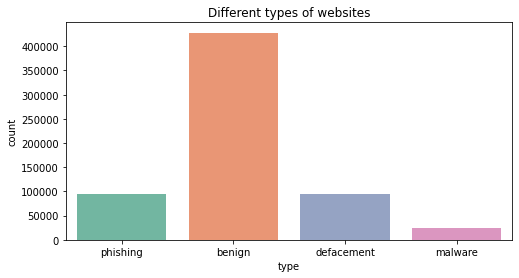

In [11]:
print(f'Total number of records: {len(df)}')
fig,ax = plt.subplots(figsize = (8,4))
sns.countplot(df.type, palette = 'Set2')
ax.set_title('Different types of websites');
st.bar_chart()

### Including more benign websites

In [12]:
url = 'https://moz.com/top500'
page = requests.get(url)
print(page.text)










<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml" lang="en-US">

<head>
  <meta charset="utf-8" />
  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1" />

  <link rel="home" href="https://moz.com/" />

  <link rel="preload" href="https://moz.com/mozbootstrap/fonts/lato_regular.woff2" as="font" type="font/woff2" crossorigin />
  <link rel="preload" href="https://moz.com/mozbootstrap/fonts/lato_italic.woff2" as="font" type="font/woff2" crossorigin />
  <link rel="preload" href="https://moz.com/mozbootstrap/fonts/lato_bold.woff2" as="font" type="font/woff2" crossorigin />
  <link rel="preload" href="https://moz.com/mozbootstrap/fonts/roboto_slab_bold.woff2" as="font" type="font/woff2" crossorigin />
  <link rel="preload" href="https://moz.com/mozbootstrap/fonts/roboto_slab_light.woff2" as="font" type="font/woff2" cro

In [13]:
# for easier visualization
soup = BeautifulSoup(page.content,"html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://moz.com/" rel="home"/>
  <link as="font" crossorigin="" href="https://moz.com/mozbootstrap/fonts/lato_regular.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://moz.com/mozbootstrap/fonts/lato_italic.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://moz.com/mozbootstrap/fonts/lato_bold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://moz.com/mozbootstrap/fonts/roboto_slab_bold.woff2" rel="preload" type="font/woff2"/>
  <link as="font" crossorigin="" href="https://moz.com/mozbootstrap/fonts/roboto_slab_light.woff2" rel="preload" type="font/wof

In [14]:
# scrapping all urls
empty_list = []
for i in soup.find_all('a',class_ = 'text-nowrap'):
    empty_list.append(i.text)

In [15]:
benign_url_list = list(set(empty_list))
benign_url_list.remove("View analysis")
"View analysis" in benign_url_list

ValueError: list.remove(x): x not in list

In [16]:
benign_url_list_df = pd.DataFrame({"url": benign_url_list,"type":'benign'})
benign_url_list_df

,url,type
0,psychologytoday.com,benign
1,variety.com,benign
2,stanford.edu,benign
3,academia.edu,benign
4,sapo.pt,benign
...,...,...
495,dropbox.com,benign
496,metro.co.uk,benign
497,support.google.com,benign
498,akamaized.net,benign


In [17]:
df = pd.concat([df,benign_url_list_df],ignore_index = True)

### Segmenting data into different categories 

In [18]:
# get all tlds & make a new feature 
tlds = []
for url in df.url:
    try: 
        tlds.append(get_tld(url, fix_protocol = True))
    except:
        tlds.append(np.nan)
        

In [19]:
# merging into 1 dataframe
new_df = pd.concat([df,pd.DataFrame(tlds)],axis = 1).rename(columns = {0:'tlds'})


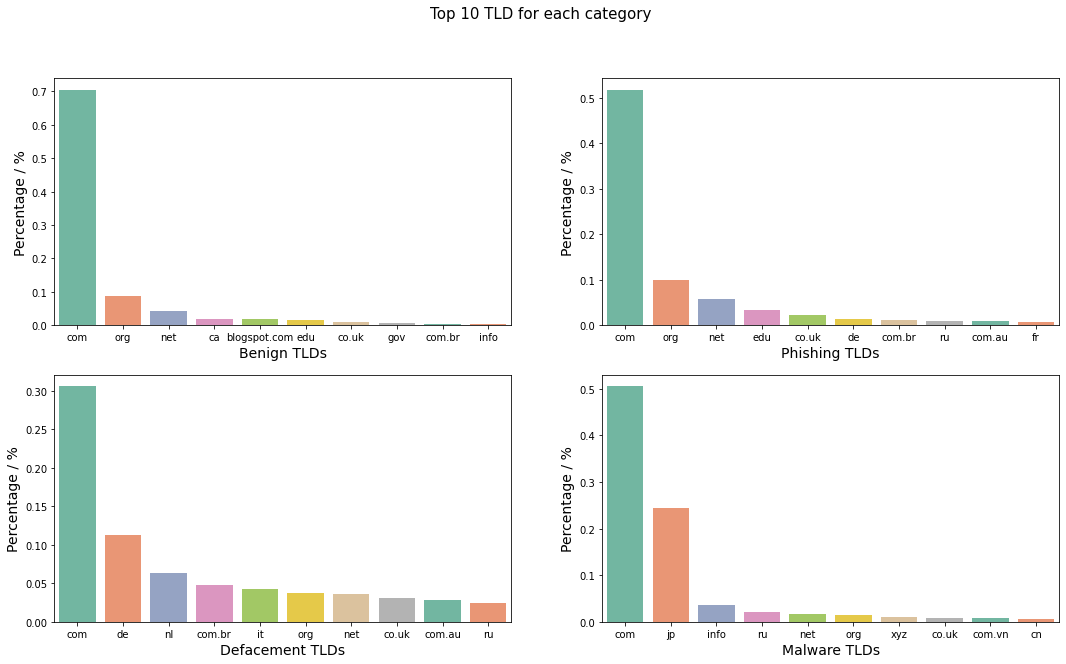

In [20]:
# viewing frequently occurring tld for each category
fig,ax = plt.subplots(2,2, figsize = (18,10))
benign_only = new_df[new_df.type == 'benign'].tlds.value_counts(normalize = True)
sns.barplot(x = benign_only[:10].index,y = benign_only[:10].values, palette = 'Set2', ax = ax[0,0])
ax[0,0].set_xlabel('Benign TLDs',fontsize = 14)
ax[0,0].set_ylabel('Percentage / %',fontsize = 14)

phishing_only = new_df[new_df.type == 'phishing'].tlds.value_counts(normalize = True)
sns.barplot(x = phishing_only[:10].index,y = phishing_only[:10].values, palette = 'Set2', ax = ax[0,1])
ax[0,1].set_xlabel('Phishing TLDs',fontsize = 14)
ax[0,1].set_ylabel('Percentage / %',fontsize = 14)

defacement_only = new_df[new_df.type == 'defacement'].tlds.value_counts(normalize = True)
sns.barplot(x = defacement_only[:10].index,y = defacement_only[:10].values, palette = 'Set2', ax = ax[1,0])
ax[1,0].set_xlabel('Defacement TLDs',fontsize = 14)
ax[1,0].set_ylabel('Percentage / %',fontsize = 14)

malware_only = new_df[new_df.type == 'malware'].tlds.value_counts(normalize = True)
sns.barplot(x = malware_only[:10].index,y = malware_only[:10].values, palette = 'Set2', ax = ax[1,1])
ax[1,1].set_xlabel('Malware TLDs',fontsize = 14)
ax[1,1].set_ylabel('Percentage / %',fontsize = 14)

fig.suptitle('Top 10 TLD for each category',fontsize = 15);

#### .com
`.com` seems to be the top occurring TLD but makes up the lowest % in defacement TLDs as compared to the other 3. Gna remove it and see how the graph changes


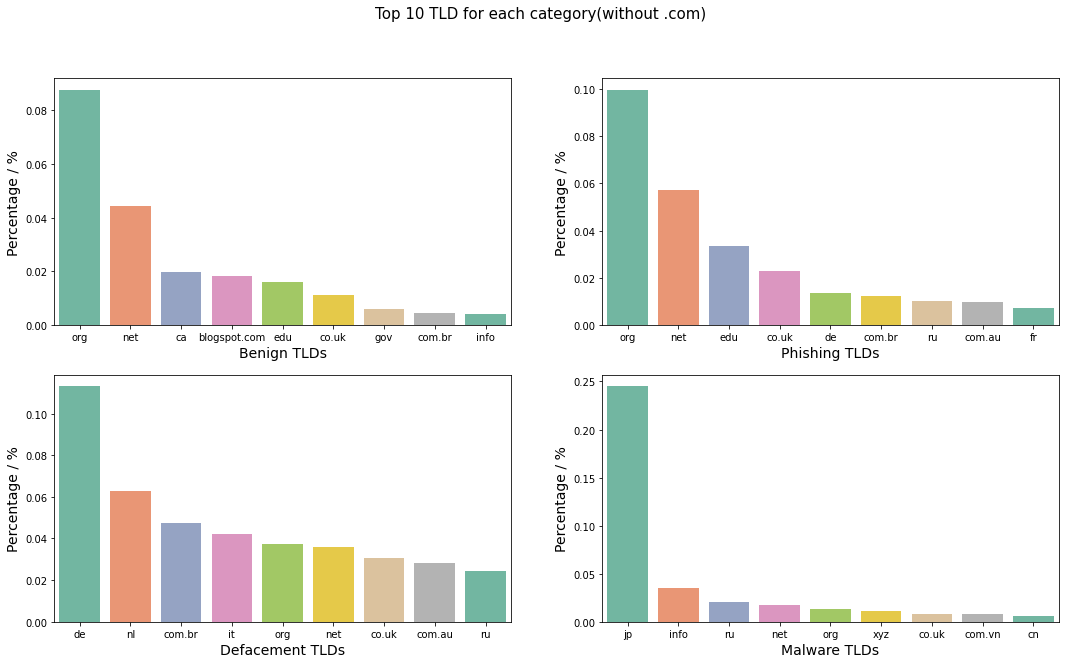

In [21]:
# viewing frequently occurring tld for each category
fig,ax = plt.subplots(2,2, figsize = (18,10))
benign_only = new_df[new_df.type == 'benign'].tlds.value_counts(normalize = True)
sns.barplot(x = benign_only[1:10].index,y = benign_only[1:10].values, palette = 'Set2', ax = ax[0,0])
ax[0,0].set_xlabel('Benign TLDs',fontsize = 14)
ax[0,0].set_ylabel('Percentage / %',fontsize = 14)

phishing_only = new_df[new_df.type == 'phishing'].tlds.value_counts(normalize = True)
sns.barplot(x = phishing_only[1:10].index,y = phishing_only[1:10].values, palette = 'Set2', ax = ax[0,1])
ax[0,1].set_xlabel('Phishing TLDs',fontsize = 14)
ax[0,1].set_ylabel('Percentage / %',fontsize = 14)

defacement_only = new_df[new_df.type == 'defacement'].tlds.value_counts(normalize = True)
sns.barplot(x = defacement_only[1:10].index,y = defacement_only[1:10].values, palette = 'Set2', ax = ax[1,0])
ax[1,0].set_xlabel('Defacement TLDs',fontsize = 14)
ax[1,0].set_ylabel('Percentage / %',fontsize = 14)

malware_only = new_df[new_df.type == 'malware'].tlds.value_counts(normalize = True)
sns.barplot(x = malware_only[1:10].index,y = malware_only[1:10].values, palette = 'Set2', ax = ax[1,1])
ax[1,1].set_xlabel('Malware TLDs',fontsize = 14)
ax[1,1].set_ylabel('Percentage / %',fontsize = 14)

fig.suptitle('Top 10 TLD for each category(without .com)',fontsize = 15);

#### .org
phishing urls seem to leverage on this recognized TLD


#### .country
will further categorize these TLDs into their respective countries to see if any insights can be found <br>
Seems like  `.de` & `.bl` are common in defacements while `.jp` is common in malwares 

In [121]:
# country_list_alpha_2 = [i.alpha_2.lower() for i in list(pycountry.countries)]
# wont work for unions eg .eu/.ac/.uk

In [22]:
# getting country/region codes from TLDs
new_df['countries'] = new_df['tlds'][~new_df['tlds'].isnull()].str.split('.').apply(lambda x: x[-1] if len(x[-1]) == 2 else np.nan)

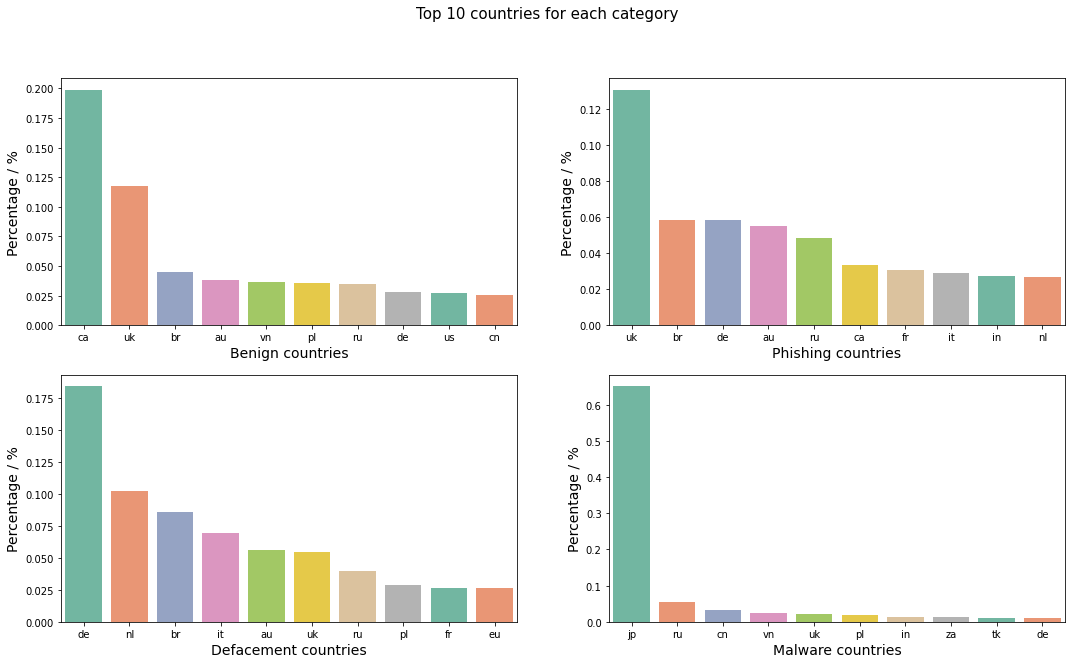

In [23]:
# viewing frequently occurring countries for each category
fig,ax = plt.subplots(2,2, figsize = (18,10))
benign_only = new_df[new_df.type == 'benign'].countries.value_counts(normalize = True)
sns.barplot(x = benign_only[:10].index,y = benign_only[:10].values, palette = 'Set2', ax = ax[0,0])
ax[0,0].set_xlabel('Benign countries',fontsize = 14)
ax[0,0].set_ylabel('Percentage / %',fontsize = 14)

phishing_only = new_df[new_df.type == 'phishing'].countries.value_counts(normalize = True)
sns.barplot(x = phishing_only[:10].index,y = phishing_only[:10].values, palette = 'Set2', ax = ax[0,1])
ax[0,1].set_xlabel('Phishing countries',fontsize = 14)
ax[0,1].set_ylabel('Percentage / %',fontsize = 14)

defacement_only = new_df[new_df.type == 'defacement'].countries.value_counts(normalize = True)
sns.barplot(x = defacement_only[:10].index,y = defacement_only[:10].values, palette = 'Set2', ax = ax[1,0])
ax[1,0].set_xlabel('Defacement countries',fontsize = 14)
ax[1,0].set_ylabel('Percentage / %',fontsize = 14)

malware_only = new_df[new_df.type == 'malware'].countries.value_counts(normalize = True)
sns.barplot(x = malware_only[:10].index,y = malware_only[:10].values, palette = 'Set2', ax = ax[1,1])
ax[1,1].set_xlabel('Malware countries',fontsize = 14)
ax[1,1].set_ylabel('Percentage / %',fontsize = 14)

fig.suptitle('Top 10 countries for each category',fontsize = 15);

In [24]:
# viewing rows will null tlds - most are malware/phishing
new_df[new_df.tlds.isnull()].type.value_counts()

malware     11769
phishing      413
benign         33
Name: type, dtype: int64

In [25]:
# looking at null TLDs & removing those with ip addresses
pattern = re.compile('(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3})')
tlds_ip = new_df[new_df['tlds'].isnull()]['url'].str.contains(pattern)
new_df['tlds_ip'] = tlds_ip

In [26]:
new_df['tlds_ip'].value_counts()

True     12126
False       89
Name: tlds_ip, dtype: int64

In [27]:
new_df[new_df['tlds_ip'].isnull()]

,url,type,tlds,countries,tlds_ip
0,br-icloud.com.br,phishing,com.br,br,NaN
1,mp3raid.com/music/krizz_kaliko.html,benign,com,NaN,NaN
2,bopsecrets.org/rexroth/cr/1.htm,benign,org,NaN,NaN
3,http://www.garage-pirenne.be/index.php?option=...,defacement,be,be,NaN
4,http://adventure-nicaragua.net/index.php?optio...,defacement,net,NaN,NaN
...,...,...,...,...,...
641620,dropbox.com,benign,com,NaN,NaN
641621,metro.co.uk,benign,co.uk,uk,NaN
641622,support.google.com,benign,com,NaN,NaN
641623,akamaized.net,benign,net,NaN,NaN


In [38]:
# remaining null tlds & null_tlds_ip
new_df[~new_df['tlds_ip'].isnull() & (new_df['tlds']).isnull()]['url']

5704       77.228.191.183:7674/zeujuus/a/modules/config.bin
10371     http://219.232.244.89/intl/update/error_login.htm
14848                 http://66.208.115.70/images/index.asp
15835     http://107.21.154.157/recordings/locale/.../my...
22112     216.92.161.171/vb/printthread.php?t=8432&pp=40...
                                ...                        
563444    Þ~³\(ÿÇ½Jú$Xm
 £ÜëÃ5{¾kÜãCê_QÊ©B
ÇÈc2...
563445                                 ëËl×uÏB'JI¨GÙn"Ç(
0
563446                           +Sj"ô*ôLð®\tT|JöäÄ2!n
577859                              0xdaf1be2b/EN/index.php
591450                            0x253BFC02/i/?zpgri&quot;
Name: url, Length: 12215, dtype: object

#### Cleaning up remaining urls without extracted TLDs
`benign`

In [39]:
# remaining urls are mainly phishing sites
new_df[(new_df['tlds_ip'] == False) & (new_df['tlds']).isnull()]['type'].value_counts()

phishing    82
benign       7
Name: type, dtype: int64

In [40]:
# Looking at benign types first
remaining_benign = new_df[(new_df.type == 'benign') & (new_df['tlds_ip'] == False & (new_df['tlds']).isnull())]
remaining_benign

,url,type,tlds,countries,tlds_ip
545237,www.udc.an/wp-includes/js/tinymce/themes/advan...,benign,NaN,NaN,False
545611,www.udc.an/wp-includes/js/tinymce/themes/advan...,benign,NaN,NaN,False
545736,772050312/www1.royalbank.com/cgi-bin/rbaccess/...,benign,NaN,NaN,False
557133,bin/webscr?cmd=_login-,benign,NaN,NaN,False
563357,è kvüDâQÎé4¼Ò©,benign,NaN,NaN,False
577859,0xdaf1be2b/EN/index.php,benign,NaN,NaN,False
591450,0x253BFC02/i/?zpgri&quot;,benign,NaN,NaN,False


In [41]:
# To extract out the remaining tlds/distinguishing parts
def urlextract_remaining(url):
    url_split=url.split(".")
    if len(url_split) <= 2:
        if url_split[0].startswith('0x'):
            return url_split[0].split('/')[0]
    
        else:
            return url_split[-1]
        
    else:
        return url_split[2].split('/')[0]

In [42]:
for i in remaining_benign.index:
    print(urlextract_remaining(remaining_benign['url'][i]))

an
an
com
bin/webscr?cmd=_login-
è kvüDâQÎé4¼Ò©
0xdaf1be2b
0x253BFC02


In [43]:
# new copy of df 
new_df2 = new_df.copy()

In [44]:
new_df2.loc[new_df2.index.isin(remaining_benign.index),'tlds'] = [urlextract_remaining(remaining_benign['url'][i]) for i in remaining_benign.index]

#### Cleaning up remaining urls without extracted TLDs
`phishing` 
- strange characters are seen as these are not recognized as utf8 encoded characters/wrong character encoding even after changing the file origin so will leave them as they are and assume most of these are signs of phishing sites

In [45]:
# Looking at phishing urls
remaining_phishing = new_df2[(new_df2.type == 'phishing') & (new_df2['tlds_ip'] == False & (new_df2['tlds']).isnull())]
remaining_phishing

,url,type,tlds,countries,tlds_ip
563354,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,phishing,NaN,NaN,False
563355,'www.institutocgr.coo/web/media/syqvem/dk-óij...,phishing,NaN,NaN,False
563356,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,phishing,NaN,NaN,False
563359,¾5092,phishing,NaN,NaN,False
563362,@ ÒÊ \ t¹Ë¨öí ,phishing,NaN,NaN,False
...,...,...,...,...,...
563442,r $ÐcYõ,phishing,NaN,NaN,False
563443,«Düéºþ +ZIdN Ö-lh9L©hDKÄúhßÆ%YqÃ±¹d,phishing,NaN,NaN,False
563444,Þ~³\(ÿÇ½Jú$Xm £ÜëÃ5{¾kÜãCê_QÊ©B ÇÈc2...,phishing,NaN,NaN,False
563445,"ëËl×uÏB'JI¨GÙn""Ç( 0",phishing,NaN,NaN,False


In [46]:
# for those with discernible urls, will use them as tlds
new_df2.loc[new_df2.index.isin(remaining_phishing.index),'tlds'] = [urlextract_remaining(remaining_phishing['url'][i]) if urlextract_remaining(remaining_phishing['url'][i]).isalpha() else np.nan for i in remaining_phishing.index ]

In [47]:
new_df2[new_df2['tlds'].isnull() & new_df2['tlds_ip'].isin([False,np.nan])]

,url,type,tlds,countries,tlds_ip
563354,wwweira¯&nvinip¿ncH¯wVö%ÆåyDaHðû/ÏyEùuË\nÓ6...,phishing,NaN,NaN,False
563356,Yìê koãÕ»Î§DéÎl½ñ¡ââqtò¸/à; Í,phishing,NaN,NaN,False
563359,¾5092,phishing,NaN,NaN,False
563362,@ ÒÊ \ t¹Ë¨öí ,phishing,NaN,NaN,False
563363,>Iq9E) l¬0ZÝìÃw!'Ôp£ãW§&£Ñ p&$ImÞôöÝYÖ,phishing,NaN,NaN,False
...,...,...,...,...,...
563442,r $ÐcYõ,phishing,NaN,NaN,False
563443,«Düéºþ +ZIdN Ö-lh9L©hDKÄúhßÆ%YqÃ±¹d,phishing,NaN,NaN,False
563444,Þ~³\(ÿÇ½Jú$Xm £ÜëÃ5{¾kÜãCê_QÊ©B ÇÈc2...,phishing,NaN,NaN,False
563445,"ëËl×uÏB'JI¨GÙn""Ç( 0",phishing,NaN,NaN,False


In [48]:
# for these strange urls, will put them under a new column called strange_url
new_df2.loc[new_df2['tlds'].isnull() & new_df2['tlds_ip'].isin([False,np.nan]),'strange_url'] = True
new_df2['strange_url'] = new_df2['strange_url'].fillna(False)

In [49]:
# all rows have at least 1 value in any of these 3 columns
new_df2[new_df2[['tlds','countries','tlds_ip']].isnull().all(axis = 1)]

,url,type,tlds,countries,tlds_ip,strange_url


In [50]:
new_df2.loc[new_df2['tlds_ip'].isnull(),'tlds_ip'] = False

### Feature Engineering
Creating new columns/features that would hopefully help to differentiate the different types of urls <br> 

#### Counting the number of special characters in each url

In [51]:
special_characters = "[$&+,:;=?@#|'<>.-^*()%!]"

In [52]:
for i in special_characters:
    new_df2['count' + i] = [new_df2['url'][j].count(i) for j in new_df2.index]

#### Counting the number of digits in each url

In [53]:
def count_digits(url):
    total = 0
    for i in url:
        if i.isnumeric():
            total += 1
    return total
        

In [54]:
new_df2['count_digits'] = [count_digits(i) for i in new_df2['url']]

#### Counting the number of alphabets in each url

In [55]:
g

In [56]:
new_df2['count_alpha'] = [count_alpha(i) for i in new_df2['url']]

#### Counting the length of each url

In [57]:
new_df2['url_length'] = [len(new_df2['url'][i]) for i in new_df2.index]

#### Counting the length of each TLD

In [58]:
new_df2['tlds'] = new_df2['tlds'].astype(str)

new_df2['tlds_length'] = [len(new_df2['tlds'][i]) for i in new_df2.index]


#### Presence of a path/sub-directory

In [59]:
pattern = re.compile('[^/]\/{1}[^/]')
new_df2['subdir'] = new_df2['url'].str.contains(pattern)

In [60]:
new_df2[new_df2['subdir'] == False]

,url,type,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,br-icloud.com.br,phishing,com.br,br,False,False,0,0,0,0,...,0,0,0,0,0,0,13,16,6,False
21,signin.eby.de.zukruygxctzmmqi.civpro.co.za,phishing,co.za,za,False,False,0,0,0,0,...,0,0,0,0,0,0,36,42,5,False
44,infinitysw.com/,benign,com,NaN,False,False,0,0,0,0,...,0,0,0,0,0,0,13,15,3,False
45,strawberrycreekgardens.com/,benign,com,NaN,False,False,0,0,0,0,...,0,0,0,0,0,0,25,27,3,False
54,ceu.hu/,benign,hu,hu,False,False,0,0,0,0,...,0,0,0,0,0,0,5,7,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641620,dropbox.com,benign,com,NaN,False,False,0,0,0,0,...,0,0,0,0,0,0,10,11,3,False
641621,metro.co.uk,benign,co.uk,uk,False,False,0,0,0,0,...,0,0,0,0,0,0,9,11,5,False
641622,support.google.com,benign,com,NaN,False,False,0,0,0,0,...,0,0,0,0,0,0,16,18,3,False
641623,akamaized.net,benign,net,NaN,False,False,0,0,0,0,...,0,0,0,0,0,0,12,13,3,False


#### Data Encoding 
For categorical variables, we need to convert them into numbers before we can feed them to our model because most machine learning models require our predictor variables to be numeric, mainly parametric models. Will be using one hot-encoding since we dont have that many features and there isnt any order to it

In [61]:
new_df3 = new_df2.copy()

In [152]:
# # only for xgboost
# new_df3 = pd.get_dummies(new_df2, columns = ['tlds','countries'])

In [62]:
new_df3.head()

,url,type,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,br-icloud.com.br,phishing,com.br,br,False,False,0,0,0,0,...,0,0,0,0,0,0,13,16,6,False
1,mp3raid.com/music/krizz_kaliko.html,benign,com,NaN,False,False,0,0,0,0,...,0,0,0,0,0,1,29,35,3,True
2,bopsecrets.org/rexroth/cr/1.htm,benign,org,NaN,False,False,0,0,0,0,...,0,0,0,0,0,1,25,31,3,True
3,http://www.garage-pirenne.be/index.php?option=...,defacement,be,be,False,False,0,0,3,0,...,0,0,0,0,0,7,63,88,2,True
4,http://adventure-nicaragua.net/index.php?optio...,defacement,net,NaN,False,False,0,0,2,0,...,0,0,0,0,0,22,199,235,3,True


#### Encoding `tlds_ip`, `subdir`, `strange_url`
1 = True, 0 = False

In [63]:
new_df3.replace(True, 1,inplace = True)
new_df3.replace(False,0,inplace = True)
new_df3.replace(np.nan,0, inplace = True)

In [64]:
new_df3.head()

,url,type,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,br-icloud.com.br,phishing,com.br,br,0,0,0,0,0,0,...,0,0,0,0,0,0,13,16,6,0
1,mp3raid.com/music/krizz_kaliko.html,benign,com,0,0,0,0,0,0,0,...,0,0,0,0,0,1,29,35,3,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,org,0,0,0,0,0,0,0,...,0,0,0,0,0,1,25,31,3,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,be,be,0,0,0,0,3,0,...,0,0,0,0,0,7,63,88,2,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,net,0,0,0,0,0,2,0,...,0,0,0,0,0,22,199,235,3,1


In [65]:
new_df2.head()

,url,type,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,br-icloud.com.br,phishing,com.br,br,False,False,0,0,0,0,...,0,0,0,0,0,0,13,16,6,False
1,mp3raid.com/music/krizz_kaliko.html,benign,com,NaN,False,False,0,0,0,0,...,0,0,0,0,0,1,29,35,3,True
2,bopsecrets.org/rexroth/cr/1.htm,benign,org,NaN,False,False,0,0,0,0,...,0,0,0,0,0,1,25,31,3,True
3,http://www.garage-pirenne.be/index.php?option=...,defacement,be,be,False,False,0,0,3,0,...,0,0,0,0,0,7,63,88,2,True
4,http://adventure-nicaragua.net/index.php?optio...,defacement,net,NaN,False,False,0,0,2,0,...,0,0,0,0,0,22,199,235,3,True


#### Removing `url`,`countries`,`tlds` after we have deconstructed it into various features

In [66]:
new_df3 = new_df3.drop(columns = ['url'])

In [67]:
new_df3.shape

(641625, 34)

In [68]:
new_df3.head()

,type,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,"count,",...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,phishing,com.br,br,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,16,6,0
1,benign,com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,29,35,3,1
2,benign,org,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,25,31,3,1
3,defacement,be,be,0,0,0,0,3,0,0,...,0,0,0,0,0,7,63,88,2,1
4,defacement,net,0,0,0,0,0,2,0,0,...,0,0,0,0,0,22,199,235,3,1


### Data Prep
Some final data prep before we can model it!

#### Baseline Accuracy

In [69]:
new_df3.type.value_counts(normalize = True) * 100

benign       66.796
defacement   14.854
phishing     14.665
malware       3.685
Name: type, dtype: float64

#### X and y variables
Splitting our target sets into target/output variable(y) and feature/input variables(X). Will be using X to predict y

In [70]:
new_df3

,type,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,"count,",...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,phishing,com.br,br,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,16,6,0
1,benign,com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,29,35,3,1
2,benign,org,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,25,31,3,1
3,defacement,be,be,0,0,0,0,3,0,0,...,0,0,0,0,0,7,63,88,2,1
4,defacement,net,0,0,0,0,0,2,0,0,...,0,0,0,0,0,22,199,235,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641620,benign,com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,11,3,0
641621,benign,co.uk,uk,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,11,5,0
641622,benign,com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,18,3,0
641623,benign,net,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,13,3,0


In [71]:
X = new_df3.drop(columns = ['type'])
y = new_df3['type']

In [162]:
# X = new_df3.drop(columns = 'type')
# y = new_df3['type']

#### Train test split
Further splitting our X and y into train and test sets, one which we used to feed our model with and the other for model validation on unseen data

In [72]:
len(new_df3.columns)

34

In [73]:
new_df3

,type,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,"count,",...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,phishing,com.br,br,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,16,6,0
1,benign,com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,29,35,3,1
2,benign,org,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,25,31,3,1
3,defacement,be,be,0,0,0,0,3,0,0,...,0,0,0,0,0,7,63,88,2,1
4,defacement,net,0,0,0,0,0,2,0,0,...,0,0,0,0,0,22,199,235,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
641620,benign,com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,10,11,3,0
641621,benign,co.uk,uk,0,0,0,0,0,0,0,...,0,0,0,0,0,0,9,11,5,0
641622,benign,com,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,18,3,0
641623,benign,net,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,13,3,0


In [74]:
# shuffling our target variable to make sur
# cant be biased 
X_train,X_test,y_train,y_test = train_test_split(X,y, shuffle = True, random_state = 42)

#### Data Scaling
Its important to scale your data so that we can put all of the features on the same scale/normalize them so they contribute equally/proportionately to our final output. This is especially crucial for models that rely on distance metrics such as kNN as well as models that leverage on gradient descent such as neural nets. Never hurts to scale(for a great peace of mind)

In [75]:
X_train.head()

,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,"count,",count:,...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
66301,com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,7,97,124,3,1
167939,com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,51,82,3,1
386909,org,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,8,50,69,3,1
551013,net,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,30,34,3,1
149959,com.vn,vn,0,0,0,0,0,0,0,1,...,0,0,0,0,0,3,67,94,6,1


In [55]:
# ss = StandardScaler()
# ss.fit(X_train)
# X_train_ss = ss.transform(X_train)
# X_test_ss = ss.transform(X_test)

### Data Modeling

#### KNN
A non-parametric model which means there isnt an underlying assumption about the data and this relies on k number of neighbours, which we can tweak, to predict our target variable. Lets assume we want to predict the class of this new url(benign/malware..), we will calculate the distance between this unknown with the closest k neighbours and use their labels to predict our unknown! Using the closest few data points we know as our predictions and this distance metric is also pre-determined, I'll be using euclidean distance as its the most common! 

In [300]:
# its an arbitrary k number
knn =  KNeighborsClassifier(n_neighbors = 100000)

In [301]:
# Validating our knn model
cross_val_score(knn,X_train_ss,y_train,cv = 10).mean()

2021-09-06 11:22:23.002 Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



#### Ensemble methods
**Gradient Boosting Classifier**

In [76]:
def plot_feature_importance(importance,names,model_type):
    sns.set_palette("Set2")
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    
    #Add chart labels
    plt.title(model_type, fontsize = 14)
    plt.xlabel('Feature Importance',fontsize = 12)
    plt.ylabel('Feature Names',fontsize = 12)

In [77]:
X_train.columns

Index(['tlds', 'countries', 'tlds_ip', 'strange_url', 'count[', 'count$',
       'count&', 'count+', 'count,', 'count:', 'count;', 'count=', 'count?',
       'count@', 'count#', 'count|', 'count'', 'count<', 'count>', 'count.',
       'count-', 'count^', 'count*', 'count(', 'count)', 'count%', 'count!',
       'count]', 'count_digits', 'count_alpha', 'url_length', 'tlds_length',
       'subdir'],
      dtype='object')

In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify = y, random_state = 42)

In [138]:
gbc = GradientBoostingClassifier(n_estimators=100,max_features='sqrt')
gbc.fit(X_train,y_train)
y_pred_gbc = gbc.predict(X_test)

In [139]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

      benign       0.87      0.97      0.92    107026
  defacement       0.80      0.95      0.87     24114
     malware       0.84      0.69      0.76      8130
    phishing       0.67      0.25      0.37     23528

    accuracy                           0.85    162798
   macro avg       0.79      0.71      0.73    162798
weighted avg       0.83      0.85      0.82    162798



In [140]:
print(f"Gradient Boosting Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_gbc),3)}")

Gradient Boosting Classifier's accuracy score: 0.846


**AdaBoost Classifier**

In [141]:
ada = AdaBoostClassifier(random_state=42,n_estimators = 100,learning_rate = 0.8,)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

In [142]:
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

      benign       0.90      0.75      0.82    107026
  defacement       0.80      0.93      0.86     24114
     malware       0.82      0.64      0.72      8130
    phishing       0.33      0.56      0.41     23528

    accuracy                           0.74    162798
   macro avg       0.71      0.72      0.70    162798
weighted avg       0.80      0.74      0.76    162798



In [143]:
print(f"AdaBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_ada),3)}")

AdaBoost Classifier's accuracy score: 0.742


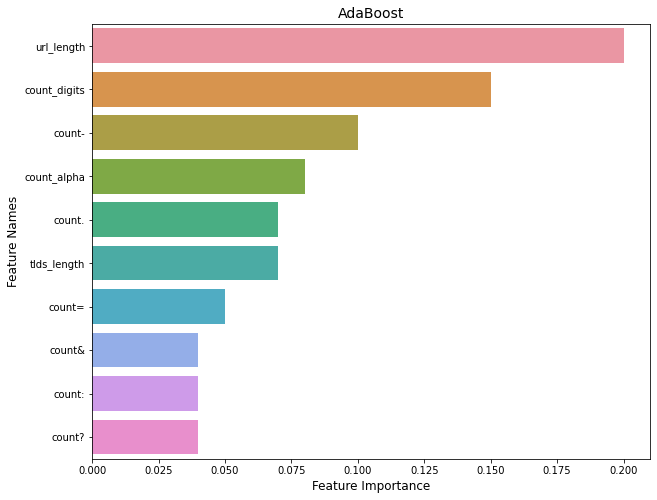

In [144]:
plot_feature_importance(ada.feature_importances_,X_train.columns, "AdaBoost")

**XgBoost Classifier** <br>
Since without `tlds`/`countries`, accuracy is still at 92%, will not encode categorical variables and remove them entirely since they are redundant and more time needed to train model

In [82]:
X_xgb = X.drop(columns = ['tlds','countries'])

In [83]:
# X_xgb = pd.get_dummies(X, columns = ['tlds','countries'])
X_train,X_test,y_train,y_test = train_test_split(X_xgb,y, stratify = y, random_state = 42)

In [84]:
X_train.columns

Index(['tlds_ip', 'strange_url', 'count[', 'count$', 'count&', 'count+',
       'count,', 'count:', 'count;', 'count=', 'count?', 'count@', 'count#',
       'count|', 'count'', 'count<', 'count>', 'count.', 'count-', 'count^',
       'count*', 'count(', 'count)', 'count%', 'count!', 'count]',
       'count_digits', 'count_alpha', 'url_length', 'tlds_length', 'subdir'],
      dtype='object')

In [85]:
# rename to fit model
X_train = X_train.rename(columns = {"count[":"countleft_bracket","count]":"countright_bracket","count<":"countleft_arrow"})
X_test = X_test.rename(columns = {"count[":"countleft_bracket","count]":"countright_bracket","count<":"countleft_arrow"})

In [91]:
start = time.time()
xgboost_1=xgb.XGBClassifier(random_state=42,learning_rate=0.9,objective='multi:softmax',n_estimators=130 )
xgboost_1.fit(X_train, y_train)
y_pred_xgb_1 = xgboost_1.predict(X_test)
print(f"Time for xgboost_1: {time.time() - start}s ")

[15:08:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time for xgboost_1: 86.06621813774109s 


In [92]:
xgboost_2=xgb.XGBClassifier(random_state=42,learning_rate=0.9,objective='multi:softmax',n_estimators=80 )
xgboost_2.fit(X_train, y_train)
y_pred_xgb_2 = xgboost_2.predict(X_test)

[15:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
# xgboost_2=xgb.XGBClassifier(random_state=42,learning_rate=0.7,objective='multi:softmax',n_estimators=80, )
# xgboost_2.fit(X_train, y_train)
# y_pred_xgb_2 = xgboost_2.predict(X_test)

In [93]:
start = time.time()
xgboost_3=xgb.XGBClassifier(random_state=42,learning_rate=0.7,objective="multi:softmax",n_estimators=100 )
xgboost_3.fit(X_train, y_train)
y_pred_xgb_3 = xgboost_3.predict(X_test)
print(f"Time for xgboost_3: {time.time() - start}s ")

[15:10:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time for xgboost_3: 66.31217384338379s 


In [94]:
start = time.time()
xgboost_4=xgb.XGBClassifier(random_state=42,learning_rate=0.8,objective="multi:softmax",n_estimators=60 )
xgboost_4.fit(X_train, y_train)
y_pred_xgb_4 = xgboost_4.predict(X_test)
print(f"Time for xgboost_4: {time.time() - start}s ")

[15:11:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time for xgboost_4: 36.343045473098755s 


In [96]:
start = time.time()
xgboost_5=xgb.XGBClassifier(random_state=42,learning_rate=0.8,objective="multi:softmax",n_estimators=40 )
xgboost_5.fit(X_train, y_train)
y_pred_xgb_5 = xgboost_5.predict(X_test)
print(f"Time for xgboost_5: {time.time() - start}s ")

[15:14:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Time for xgboost_5: 26.75000810623169s 


In [97]:
print(f"XgBoost_1 Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_1),3)}")
print(f"XgBoost_2 Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_2),3)}")
print(f"XgBoost_3 Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_3),3)}")
print(f"XgBoost_4 Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_4),3)}")
print(f"XgBoost_5 Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_5),3)}")

XgBoost_1 Classifier's accuracy score: 0.922
XgBoost_2 Classifier's accuracy score: 0.92
XgBoost_3 Classifier's accuracy score: 0.919
XgBoost_4 Classifier's accuracy score: 0.915
XgBoost_5 Classifier's accuracy score: 0.911


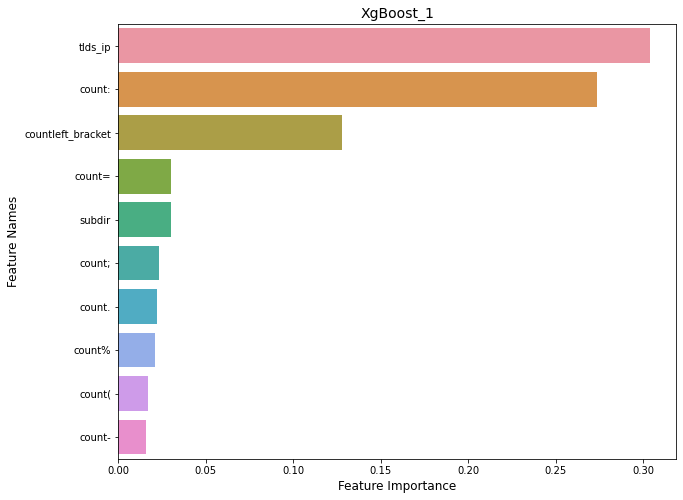

In [294]:
plot_feature_importance(xgboost_1.feature_importances_, X_train.columns, "XgBoost_1")

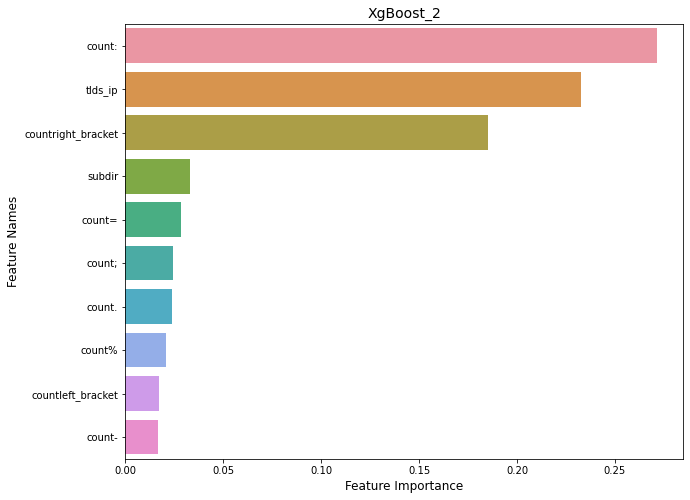

In [137]:
plot_feature_importance(xgboost_2.feature_importances_, X_train.columns, "XgBoost_2")

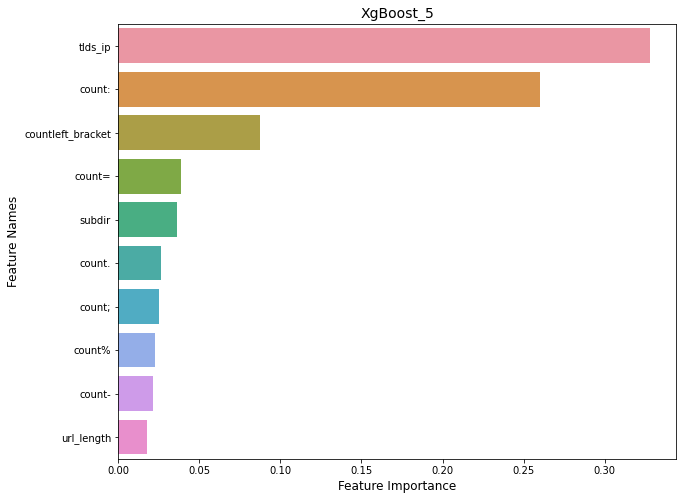

In [98]:
plot_feature_importance(xgboost_5.feature_importances_,X_train.columns,"XgBoost_5")

In [145]:
print(f"Gradient Boosting Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_gbc),3)}")
print(f"AdaBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_ada),3)}")
print(f"XgBoost 1 Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_1),3)}")
print(f"XgBoost 4 Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_4),3)}")


Gradient Boosting Classifier's accuracy score: 0.846
AdaBoost Classifier's accuracy score: 0.742
XgBoost 1 Classifier's accuracy score: 0.922
XgBoost 4 Classifier's accuracy score: 0.914


#### CatBoost

In [124]:
X.head()

,tlds,countries,tlds_ip,strange_url,count[,count$,count&,count+,"count,",count:,...,count(,count),count%,count!,count],count_digits,count_alpha,url_length,tlds_length,subdir
0,com.br,br,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,16,6,0
1,com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,29,35,3,1
2,org,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,25,31,3,1
3,be,be,0,0,0,0,3,0,0,1,...,0,0,0,0,0,7,63,88,2,1
4,net,0,0,0,0,0,2,0,0,1,...,0,0,0,0,0,22,199,235,3,1


In [134]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [135]:
cbc =CatBoostClassifier(iterations=100, verbose=10)
# categorical_features_indices = np.where(df.dtypes != np.float)[0]
cbc.fit(X_train,y_train,eval_set=(X_test, y_test))
y_pred_cbc = cbc.predict(X_test)

Learning rate set to 0.294425
0:	learn: 0.9072064	test: 0.9064689	best: 0.9064689 (0)	total: 145ms	remaining: 14.3s
10:	learn: 0.3903090	test: 0.3891668	best: 0.3891668 (10)	total: 1.44s	remaining: 11.6s
20:	learn: 0.3469701	test: 0.3462835	best: 0.3462835 (20)	total: 2.73s	remaining: 10.3s
30:	learn: 0.3297186	test: 0.3290502	best: 0.3290502 (30)	total: 3.92s	remaining: 8.74s
40:	learn: 0.3178731	test: 0.3169316	best: 0.3169316 (40)	total: 5.21s	remaining: 7.49s
50:	learn: 0.3096767	test: 0.3088517	best: 0.3088517 (50)	total: 6.55s	remaining: 6.29s
60:	learn: 0.3031243	test: 0.3023937	best: 0.3023937 (60)	total: 7.85s	remaining: 5.02s
70:	learn: 0.2959917	test: 0.2953381	best: 0.2953381 (70)	total: 9.17s	remaining: 3.75s
80:	learn: 0.2901634	test: 0.2896475	best: 0.2896475 (80)	total: 10.5s	remaining: 2.45s
90:	learn: 0.2853139	test: 0.2849074	best: 0.2849074 (90)	total: 11.8s	remaining: 1.17s
99:	learn: 0.2812147	test: 0.2808965	best: 0.2808965 (99)	total: 13s	remaining: 0us

bestTes

In [136]:
print(classification_report(y_test,y_pred_cbc))

              precision    recall  f1-score   support

      benign       0.92      0.96      0.94    107146
  defacement       0.88      0.94      0.91     23827
     malware       0.89      0.79      0.84      5911
    phishing       0.75      0.55      0.64     23523

    accuracy                           0.89    160407
   macro avg       0.86      0.81      0.83    160407
weighted avg       0.89      0.89      0.89    160407



In [137]:
print(f"CatBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_cbc),3)}")

CatBoost Classifier's accuracy score: 0.893


In [98]:
# print(f"CatBoost Classifier 2's accuracy score: {round(accuracy_score(y_test, y_pred_cbc_2),3)}")

CatBoost Classifier 2's accuracy score: 0.899


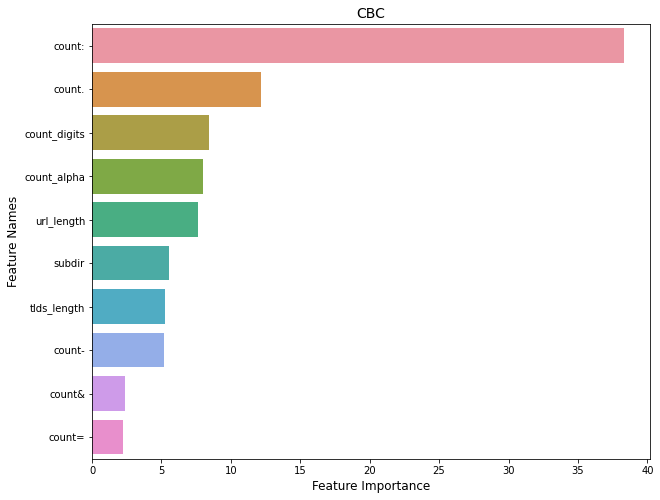

In [138]:
plot_feature_importance(cbc.feature_importances_, X_train.columns, "CBC")

In [153]:
print(f"Gradient Boosting Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_gbc),3)}")
print(f"AdaBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_ada),3)}")
print(f"XgBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_xgb_1),3)}")
print(f"CatBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_cbc),3)}")


Gradient Boosting Classifier's accuracy score: 0.846
AdaBoost Classifier's accuracy score: 0.742
XgBoost Classifier's accuracy score: 0.922
CatBoost Classifier's accuracy score: 0.888


In [154]:
parameters = {'depth': [6,7,8,9,10],'learning_rate': [0.01,0.02,0.03,0.04],'iterations': [20,40,50,60,100]}

In [155]:
cbc_grid = GridSearchCV(estimator= cbc, param_grid = parameters, cv = 2, n_jobs=-1)
cbc_grid.fit(X_train, y_train)

0:	learn: 1.3065498	total: 496ms	remaining: 49.1s
10:	learn: 0.8580717	total: 5.72s	remaining: 46.3s
20:	learn: 0.6546975	total: 10.5s	remaining: 39.6s
30:	learn: 0.5409285	total: 15.1s	remaining: 33.5s
40:	learn: 0.4704710	total: 19.6s	remaining: 28.1s
50:	learn: 0.4250339	total: 24s	remaining: 23.1s
60:	learn: 0.3953132	total: 28.5s	remaining: 18.2s
70:	learn: 0.3740630	total: 33s	remaining: 13.5s
80:	learn: 0.3588615	total: 37.5s	remaining: 8.79s
90:	learn: 0.3485231	total: 41.9s	remaining: 4.14s
99:	learn: 0.3410338	total: 45.9s	remaining: 0us


GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001959AEDF490>,
             n_jobs=-1,
             param_grid={'depth': [6, 7, 8, 9, 10],
                         'iterations': [20, 40, 50, 60, 100],
                         'learning_rate': [0.01, 0.02, 0.03, 0.04]})

In [156]:
cbc_grid.best_params_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.04}

In [157]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",cbc_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",cbc_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",cbc_grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8686283373169283

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.04}


In [158]:
y_pred_best_cbc = cbc_grid.predict(X_test)
print(f"CatBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_best_cbc),3)}")

CatBoost Classifier's accuracy score: 0.868


In [139]:
cbc_grid_best_1 = CatBoostClassifier(depth = 8, iterations = 100, learning_rate = 0.8)
cbc_grid_best_1.fit(X_train,y_train)
y_pred_best_cbc_1 = cbc_grid_best_1.predict(X_test)
print(f"CatBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_best_cbc_1),3)}")

0:	learn: 0.5215887	total: 331ms	remaining: 32.7s
1:	learn: 0.4219698	total: 655ms	remaining: 32.1s
2:	learn: 0.3807729	total: 1s	remaining: 32.5s
3:	learn: 0.3601593	total: 1.39s	remaining: 33.4s
4:	learn: 0.3484211	total: 1.78s	remaining: 33.8s
5:	learn: 0.3444643	total: 2.15s	remaining: 33.7s
6:	learn: 0.3377219	total: 2.56s	remaining: 34s
7:	learn: 0.3307881	total: 2.99s	remaining: 34.3s
8:	learn: 0.3277300	total: 3.36s	remaining: 34s
9:	learn: 0.3216081	total: 3.74s	remaining: 33.6s
10:	learn: 0.3184000	total: 4.13s	remaining: 33.4s
11:	learn: 0.3124684	total: 4.5s	remaining: 33s
12:	learn: 0.3076269	total: 4.87s	remaining: 32.6s
13:	learn: 0.3046877	total: 5.23s	remaining: 32.1s
14:	learn: 0.2995417	total: 5.61s	remaining: 31.8s
15:	learn: 0.2973676	total: 6s	remaining: 31.5s
16:	learn: 0.2926989	total: 6.38s	remaining: 31.1s
17:	learn: 0.2902351	total: 6.74s	remaining: 30.7s
18:	learn: 0.2864939	total: 7.11s	remaining: 30.3s
19:	learn: 0.2849069	total: 7.49s	remaining: 30s
20:	l

In [153]:
cbc_2 = CatBoostClassifier(depth = 4, iterations = 80, learning_rate = 0.8)
cbc_2.fit(X_train,y_train)
y_pred_cbc_2 = cbc_2.predict(X_test)

0:	learn: 0.5975967	total: 104ms	remaining: 8.25s
1:	learn: 0.4980347	total: 204ms	remaining: 7.97s
2:	learn: 0.4455652	total: 310ms	remaining: 7.96s
3:	learn: 0.4185321	total: 405ms	remaining: 7.69s
4:	learn: 0.4060110	total: 492ms	remaining: 7.38s
5:	learn: 0.3973422	total: 578ms	remaining: 7.13s
6:	learn: 0.3874272	total: 688ms	remaining: 7.17s
7:	learn: 0.3834204	total: 783ms	remaining: 7.04s
8:	learn: 0.3802595	total: 870ms	remaining: 6.87s
9:	learn: 0.3731640	total: 985ms	remaining: 6.89s
10:	learn: 0.3680215	total: 1.1s	remaining: 6.88s
11:	learn: 0.3645997	total: 1.19s	remaining: 6.72s
12:	learn: 0.3619022	total: 1.28s	remaining: 6.58s
13:	learn: 0.3597870	total: 1.36s	remaining: 6.43s
14:	learn: 0.3556601	total: 1.47s	remaining: 6.38s
15:	learn: 0.3541827	total: 1.57s	remaining: 6.29s
16:	learn: 0.3513181	total: 1.69s	remaining: 6.25s
17:	learn: 0.3491320	total: 1.79s	remaining: 6.17s
18:	learn: 0.3473447	total: 1.89s	remaining: 6.08s
19:	learn: 0.3445201	total: 1.99s	remainin

In [154]:
print(f"CatBoost Classifier 2's accuracy score: {round(accuracy_score(y_test, y_pred_cbc_2),3)}")

CatBoost Classifier 2's accuracy score: 0.892


In [155]:
def plot_feature_importance(importance,names,model_type):
    sns.set_palette("Set2")
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'][:10], y=fi_df['feature_names'][:10])
    
    #Add chart labels
    plt.title(model_type, fontsize = 14)
    plt.xlabel('Feature Importance',fontsize = 12)
    plt.ylabel('Feature Names',fontsize = 12)

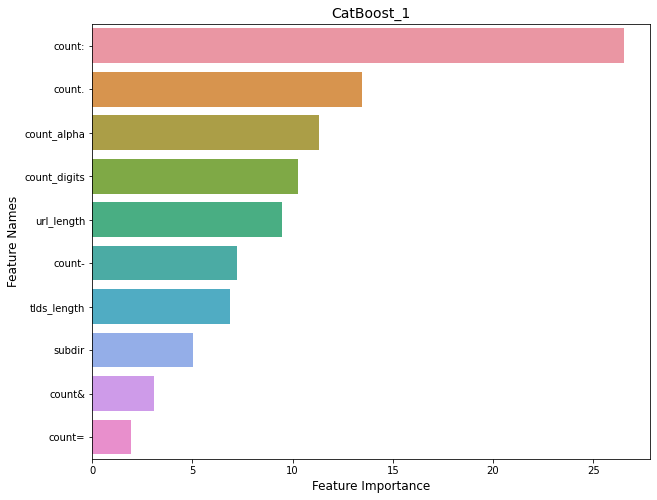

In [156]:
plot_feature_importance(cbc_grid_best_1.feature_importances_, X_train.columns, "CatBoost_1")

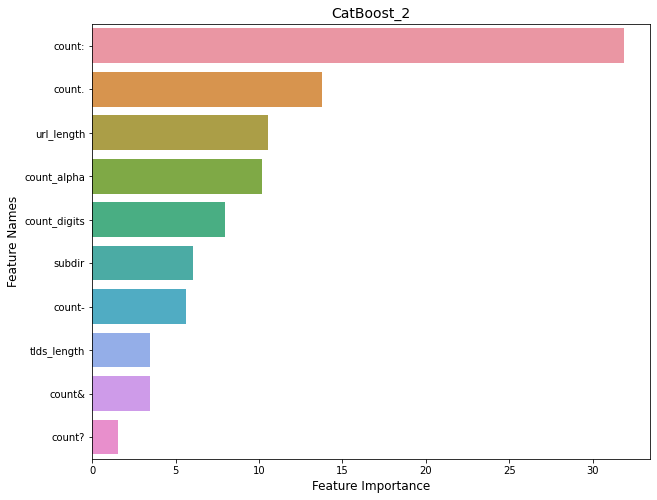

In [158]:
plot_feature_importance(cbc_2.feature_importances_, X_train.columns, "CatBoost_2")

In [159]:
# cbc_grid_best_2 = CatBoostClassifier(depth = 8, iterations = 100, learning_rate = 0.9)
# cbc_grid_best_2.fit(X_train,y_train)
# y_pred_best_cbc_2 = cbc_grid_best_2.predict(X_test)
# print(f"CatBoost Classifier's accuracy score: {round(accuracy_score(y_test, y_pred_best_cbc_1),3)}")

#### Neural Nets


In [223]:
y_train_ss = np_utils.to_categorical(np.asarray(y_train.factorize()[0]))
y_test_ss = np_utils.to_categorical(np.asarray(y_test.factorize()[0]))

In [261]:
from keras import regularizers


In [298]:
model = Sequential()
model.add(Dense(31,activation = 'relu',input_shape = (31,),kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(16,activation = 'relu',kernel_regularizer=regularizers.l2(0.0001)))
model.add(Dense(4,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['acc'])
history = model.fit(X_train_ss,y_train_ss,validation_data=(X_test_ss,y_test_ss),
                   batch_size = 150000, epochs = 50)

Epoch 1/50
4/4 [==============================] - 1s 110ms/step - loss: 1.3272 - acc: 0.5853 - val_loss: 1.2786 - val_acc: 0.6035
Epoch 2/50
4/4 [==============================] - 0s 35ms/step - loss: 1.2811 - acc: 0.6079 - val_loss: 1.2519 - val_acc: 0.6397
Epoch 3/50
4/4 [==============================] - 0s 35ms/step - loss: 1.2390 - acc: 0.6402 - val_loss: 1.2275 - val_acc: 0.6492
Epoch 4/50
4/4 [==============================] - 0s 36ms/step - loss: 1.1985 - acc: 0.6481 - val_loss: 1.2031 - val_acc: 0.6538
Epoch 5/50
4/4 [==============================] - 0s 35ms/step - loss: 1.1585 - acc: 0.6537 - val_loss: 1.1786 - val_acc: 0.6582
Epoch 6/50
4/4 [==============================] - 0s 36ms/step - loss: 1.1206 - acc: 0.6567 - val_loss: 1.1547 - val_acc: 0.6588
Epoch 7/50
4/4 [==============================] - 0s 35ms/step - loss: 1.0835 - acc: 0.6571 - val_loss: 1.1317 - val_acc: 0.6588
Epoch 8/50
4/4 [==============================] - 0s 35ms/step - loss: 1.0458 - acc: 0.6572 - va

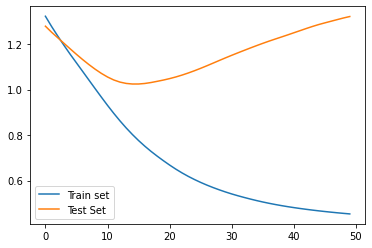

In [383]:
plt.plot(history.history['loss'],label = 'Train set')
plt.plot(history.history['val_loss'],label = 'Test Set')
plt.legend()


### Final Model
Catboost will be my final model

In [99]:
X_train.columns

Index(['tlds_ip', 'strange_url', 'countleft_bracket', 'count$', 'count&',
       'count+', 'count,', 'count:', 'count;', 'count=', 'count?', 'count@',
       'count#', 'count|', 'count'', 'countleft_arrow', 'count>', 'count.',
       'count-', 'count^', 'count*', 'count(', 'count)', 'count%', 'count!',
       'countright_bracket', 'count_digits', 'count_alpha', 'url_length',
       'tlds_length', 'subdir'],
      dtype='object')

In [161]:
# Cleaning input
def clean_input(url, columns = [X_train.columns]):
    
    # 1) Get TLD
    url_df = pd.DataFrame(columns = ['url'])
    url_df.loc['url'] = url
    
    url_df.loc["tlds"] = get_tld(url, fix_protocol = True)
    url_df = url_df.T.reset_index().drop(columns = 'index')
    
    


    #2) Get country/region code if any
#     url_df['countries'] = url_df['tlds'][~url_df['tlds'].isnull()].str.split('.').apply(lambda x: x[-1] if len(x[-1]) == 2 else np.nan)
    
    #3) get ip addresses if any
    url_df['tlds_ip'] = url_df[url_df['tlds'].isnull()]['url'].str.contains(pattern)

    #4) if tlds is still null:
    
    url_df.loc[url_df["tlds"].isnull(), "tlds"] = urlextract_remaining(url)
    
    
    #5) for strange urls:
    
    url_df.loc[url_df['tlds'].isnull() & url_df['tlds_ip'].isin([False,np.nan]),'strange_url'] = True
        
        
    url_df['strange_url'] = url_df['strange_url'].fillna(False)    
    #6) count no. of special chars:
    for i in special_characters:
        url_df['count' + i] = [url_df['url'][j].count(i) for j in url_df.index]
    
     #7) Count digits
    url_df['count_digits'] = count_digits(url)

    url_df.loc[url_df['count_digits'].isnull(), "count_digits"] = 0
    
     #8) Count alphabets
    url_df['count_alpha'] = count_alpha(url)

    url_df.loc[url_df['count_alpha'].isnull(), "count_alpha"] = 0
    
     #9) Count length of url
    url_df['url_length'] = len(url) 
    
     #10) Count length of tld
    url_df['tlds'] = url_df['tlds'].astype(str)
    url_df['tlds_length'] = url_df['tlds'].str.len()
    url_df.loc[url_df['tlds_length'].isnull(), "tlds_length"] = 0
    
     #11) presence of path/sub-dir
    sub_pattern = re.compile('[^/]\/{1}[^/]')
    url_df['subdir'] = re.match(sub_pattern,url)
    
     #12) Data encoding:
#     url_df = pd.get_dummies(url_df, columns = ['tlds','countries'])
     #13) Encoding `tlds_ip`, `subdir`, `strange_url`
    url_df = url_df.rename(columns = {"count[":"countleft_bracket","count]":"countright_bracket","count<":"countleft_arrow"})
    url_df.replace(True, 1,inplace = True)
    url_df.replace(False,0,inplace = True)
    url_df.replace(np.nan,0, inplace = True)
     #14) Drop these as we have already dummified/deconstructed them
    url_df = url_df.drop(columns = ['url','tlds'])
    
    return url_df

    

    
    

In [101]:
X_train.head()

,tlds_ip,strange_url,countleft_bracket,count$,count&,count+,"count,",count:,count;,count=,...,count(,count),count%,count!,countright_bracket,count_digits,count_alpha,url_length,tlds_length,subdir
482471,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,9,30,44,3,1
129057,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,102,118,3,1
605509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,22,3,1
496952,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,10,52,71,3,1
204618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,49,55,3,1


In [163]:
eg_1 = clean_input('br-icloud.com.br')

In [162]:
clean_input('br-icloud.com.br')

,tlds_ip,strange_url,countleft_bracket,count$,count&,count+,"count,",count:,count;,count=,...,count(,count),count%,count!,countright_bracket,count_digits,count_alpha,url_length,tlds_length,subdir
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,13,16,6,0


In [121]:
eg_1 = clean_input("www.google.com")

### Fitting entire dataset

In [130]:
X_all = X.drop(columns = ['tlds','countries'])
X_all = X_all.rename(columns = {"count[":"countleft_bracket","count]":"countright_bracket","count<":"countleft_arrow"})
# final_model = xgb.XGBClassifier(random_state=42,learning_rate=0.9,objective='multi:softmax',n_estimators=130 )
# final_model.fit(X_all, y)

In [113]:
# start = time.time()
# final_xgb_model=xgb.XGBClassifier(random_state=42,learning_rate=0.8,objective="multi:softmax",n_estimators=40 )
# final_xgb_model.fit(X_all, y)
# y_pred_xgb_final = final_xgb_model.final_xgb_model(X_test)
# print(f"Time for xgboost_5: {time.time() - start}s ")

In [164]:
final_cbc_model = CatBoostClassifier(depth = 4, iterations = 80, learning_rate = 0.8)
final_cbc_model.fit(X_all, y)

0:	learn: 0.5973343	total: 155ms	remaining: 12.2s
1:	learn: 0.4978440	total: 295ms	remaining: 11.5s
2:	learn: 0.4452755	total: 443ms	remaining: 11.4s
3:	learn: 0.4222026	total: 569ms	remaining: 10.8s
4:	learn: 0.4076926	total: 705ms	remaining: 10.6s
5:	learn: 0.3993969	total: 836ms	remaining: 10.3s
6:	learn: 0.3950794	total: 955ms	remaining: 9.96s
7:	learn: 0.3853281	total: 1.1s	remaining: 9.95s
8:	learn: 0.3799295	total: 1.25s	remaining: 9.83s
9:	learn: 0.3765090	total: 1.38s	remaining: 9.66s
10:	learn: 0.3719541	total: 1.49s	remaining: 9.35s
11:	learn: 0.3687229	total: 1.61s	remaining: 9.1s
12:	learn: 0.3649862	total: 1.75s	remaining: 9s
13:	learn: 0.3623806	total: 1.87s	remaining: 8.82s
14:	learn: 0.3599037	total: 2s	remaining: 8.64s
15:	learn: 0.3547373	total: 2.17s	remaining: 8.68s
16:	learn: 0.3525442	total: 2.31s	remaining: 8.56s
17:	learn: 0.3497908	total: 2.45s	remaining: 8.44s
18:	learn: 0.3467058	total: 2.59s	remaining: 8.3s
19:	learn: 0.3439026	total: 2.73s	remaining: 8.18s

In [165]:
clean_input("www.google.com")['subdir']

0    0
Name: subdir, dtype: int64

In [166]:
clean_input("www.google.com")

,tlds_ip,strange_url,countleft_bracket,count$,count&,count+,"count,",count:,count;,count=,...,count(,count),count%,count!,countright_bracket,count_digits,count_alpha,url_length,tlds_length,subdir
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,14,3,0


In [115]:
df.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [167]:
final_cbc_model.predict(clean_input("www.twitter.com"))

array([['benign']], dtype=object)

In [168]:
final_cbc_model.predict(clean_input("www.yahoo.com"))

array([['benign']], dtype=object)

In [169]:
import pickle 
pickle_out = open("cbc_classifier.pkl", mode = "wb") 
pickle.dump(final_cbc_model, pickle_out) 
pickle_out.close()

Changing to catboost because of overfitting in xgboost thus urls such as google.com gives phishing instead of benign, cbc with fewer iterations result in less overfitting but will compromise slightly on accuracy

Also need to take into account of tlds that do not exist yet